In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn import metrics

LOAD CSV FILE

In [16]:
data = pd.read_csv('iris_dataset.csv')

EXPLORE THE DATA SET Exploratory Data Analysis.

In [17]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
data.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0



VISUALIZE THE DATASET PLOTTING

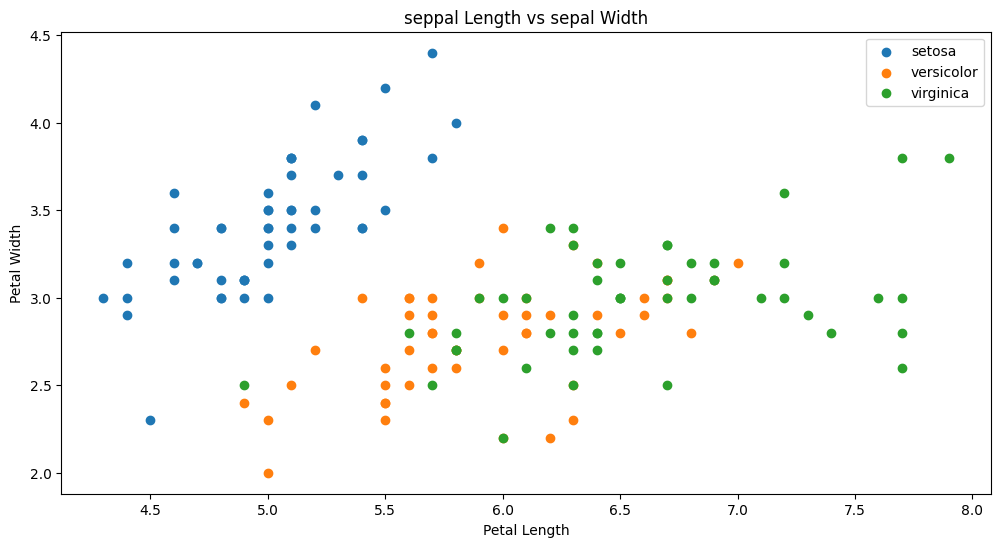

In [19]:
plt.figure(figsize=(12,6))
for species, species_data in data.groupby('species'):
  plt.scatter(species_data['sepal_length'], species_data['sepal_width'], label=species)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.title('seppal Length vs sepal Width')
plt.show()

DECISION TREE CLASSIFIER

In [20]:
x = data.drop('species', axis = 1)
y = data['species']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) #TRAIN THE MODEL

In [22]:
clf = DecisionTreeClassifier()

In [23]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [24]:
#VISUALIZE THE D.TREE MODEL
dot_data = export_graphviz(clf, out_file=None, feature_names=x.columns, class_names=clf.classes_, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('iris_decision_tree.png')

True

In [25]:
y_pred = clf.predict(x_test)

In [26]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy:, accuracy:.2f)")
print(f"Precision:, precision:.2f)")
print(f"Recall:, recall:.2f)")
print(f"F1 Score:, f1_score:.2f)")
#EVALUATE THE MODEL PERFORMANCE

Accuracy:, accuracy:.2f)
Precision:, precision:.2f)
Recall:, recall:.2f)
F1 Score:, f1_score:.2f)


DECISION TREE CLASSIFIER

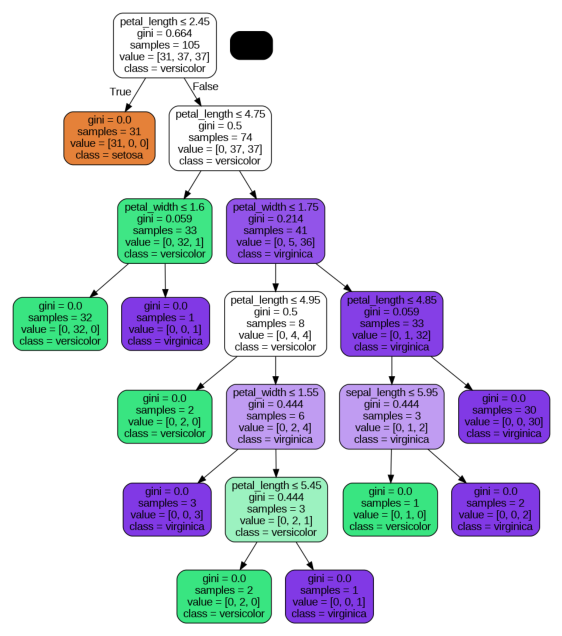

In [27]:
plt.figure(figsize=(12,8))
plt.imshow(plt.imread("iris_decision_tree.png"))
plt.axis('off')
plt.show()